In [590]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 130)

In [526]:
all_data = pd.read_csv('data/all_u.csv')
tw = pd.read_csv('data/tw.csv')
tw = pd.read_csv('data/fb.csv')
accounts = pd.read_csv('data/accounts.csv')
df = all_data.rename({'combined/createdDate':'createdDate',
                          'combined/messageId': 'uniqueMessageId',
                          'combined/uniqueUserId':'uniqueUserId',
                          'twitter.tweet/retweetCount': 'retweetCount',
                          'crowdtangle.account/subscriberCount' : 'subscriberCount',
                          'combined/userHandle':'userHandle',
                          'combined/text':'text'}, axis=1)
df['createdDate'] = pd.to_datetime(df['createdDate'], errors='coerce')


In [580]:
df_2020 = df[df.createdDate.dt.year==2020]
df_2020_week = df_2020.groupby( df_2020.createdDate.dt.strftime('%W'))
df_2020_tw = df_2020[df_2020.platformPrefix =='tw']
df_2020_fb = df_2020[df_2020.platformPrefix =='fb']
df_2020_week_tw = df_2020_tw.groupby( df_2020.createdDate.dt.strftime('%W'))
df_2020_week_fb = df_2020_fb.groupby( df_2020.createdDate.dt.strftime('%W'))

# Twitter engagement

In [617]:
df_2020_tw.groupby(['uniqueUserId'])['twitter.user/followersCount'].mean().sum()

52020453.85691713

# Facebook engagement

In [552]:
df_2020_week['crowdtangle.stats.actual/angryCount'].sum().mean()
# df_2020_week['retweetCount'].sum().mean()

1426.4528301886792

In [597]:
engagement = {'retweetCount':[44,312151],
             'angryCount':[1.34,1426],
             'careCount':[0.87,203],
             'commentCount':[15.3,16352],
             'hahaCount':[2.06,2197],
             'likeCount':[169.8,180642],
             'loveCount':[14.2,15108],
             'sadCount':[2.5,2671],
             'shareCount':[23.4,24938],
             'wowCount':[1.47,1565],
             }



In [598]:
d = pd.DataFrame(engagement.items(), columns =['metric','score'])


In [599]:

engagment_df = pd.DataFrame(d.score.tolist(), index= d.index, columns =['average per message', 'average per week'])

In [600]:
engagment_df['metric'] = d['metric']

In [601]:
engagment_df[['metric','average per message','average per week' ]]

,metric,average per message,average per week
0,retweetCount,44.00,312151
1,angryCount,1.34,1426
2,careCount,0.87,203
3,commentCount,15.30,16352
4,hahaCount,2.06,2197
5,likeCount,169.80,180642
6,loveCount,14.20,15108
7,sadCount,2.50,2671
8,shareCount,23.40,24938
9,wowCount,1.47,1565


In [606]:
engagment_df = engagment_df.iloc[1:]

In [611]:
print(engagment_df['average per week'].sum())
print(engagment_df['average per message'].sum())

245102
230.94


In [ ]:
1426
203
16352
2197
180642
15108
2671
24938
1565

In [ ]:
'crowdtangle.stats.actual/angryCount'
'crowdtangle.stats.actual/careCount'
'crowdtangle.stats.actual/commentCount'
'crowdtangle.stats.actual/favoriteCount'
'crowdtangle.stats.actual/hahaCount'
'crowdtangle.stats.actual/likeCount'
'crowdtangle.stats.actual/loveCount'
'crowdtangle.stats.actual/sadCount'
'crowdtangle.stats.actual/shareCount'
'crowdtangle.stats.actual/thankfulCount'
'crowdtangle.stats.actual/wowCount'

In [546]:
print(df_2020_fb['crowdtangle.stats.actual/angryCount'].mean())
print(df_2020_fb['crowdtangle.stats.actual/careCount'].mean())
print(df_2020_fb['crowdtangle.stats.actual/commentCount'].mean())
print(df_2020_fb['crowdtangle.stats.actual/hahaCount'].mean())
print(df_2020_fb['crowdtangle.stats.actual/likeCount'].mean())
print(df_2020_fb['crowdtangle.stats.actual/loveCount'].mean())
print(df_2020_fb['crowdtangle.stats.actual/sadCount'].mean())
print(df_2020_fb['crowdtangle.stats.actual/shareCount'].mean())
print(df_2020_fb['crowdtangle.stats.actual/wowCount'].mean())




1.3410554323725055
0.8702715809893308
15.37360532150776
2.0657560975609757
169.8279024390244
14.204221729490023
2.5112549889135254
23.44569401330377
1.471929046563193


In [553]:
print(df_2020_week['crowdtangle.stats.actual/angryCount'].sum().mean())
print(df_2020_week['crowdtangle.stats.actual/careCount'].sum().mean())
print(df_2020_week['crowdtangle.stats.actual/commentCount'].sum().mean())
print(df_2020_week['crowdtangle.stats.actual/hahaCount'].sum().mean())
print(df_2020_week['crowdtangle.stats.actual/likeCount'].sum().mean())
print(df_2020_week['crowdtangle.stats.actual/loveCount'].sum().mean())
print(df_2020_week['crowdtangle.stats.actual/sadCount'].sum().mean())
print(df_2020_week['crowdtangle.stats.actual/shareCount'].sum().mean())
print(df_2020_week['crowdtangle.stats.actual/wowCount'].sum().mean())




1426.4528301886792
203.1509433962264
16352.584905660377
2197.301886792453
180642.4150943396
15108.735849056604
2671.169811320755
24938.69811320755
1565.6603773584907


In [554]:
print(df_2020_week['crowdtangle.stats.actual/angryCount'].mean().mean())
print(df_2020_week['crowdtangle.stats.actual/careCount'].mean().mean())
print(df_2020_week['crowdtangle.stats.actual/commentCount'].mean().mean())
print(df_2020_week['crowdtangle.stats.actual/hahaCount'].mean().mean())
print(df_2020_week['crowdtangle.stats.actual/likeCount'].mean().mean())
print(df_2020_week['crowdtangle.stats.actual/loveCount'].mean().mean())
print(df_2020_week['crowdtangle.stats.actual/sadCount'].mean().mean())
print(df_2020_week['crowdtangle.stats.actual/shareCount'].mean().mean())
print(df_2020_week['crowdtangle.stats.actual/wowCount'].mean().mean())




1.36681923185585
0.866932088840806
15.264234126432607
2.1313700441509495
174.77246073375835
14.109281541810303
2.4980504628760025
23.109045565968223
1.6112186070464372


In [581]:
df_2020_week['uniqueUserId'].nunique().mean()


227.81132075471697

In [585]:
df_2020_week_tw['uniqueUserId'].nunique().mean()


156.0

In [583]:
df_2020_week_fb['uniqueUserId'].nunique().mean()


71.81132075471699

# EXECUTIVE SUMMARY

In [91]:
df_2020 = df[df.createdDate.dt.year==2020]
df_2020_week = df_2020.groupby( df_2020.createdDate.dt.strftime('%W'))

### X Chinese public diplomacy accounts will be active across Facebook and Twitter : 227.811 a week

In [92]:
df_2020_week['uniqueUserId'].nunique().mean()

227.81132075471697

### They’ll post X times in total. Y on Twitter and Y on Facebook : 8057.11 a week. 6993.43 on Twitter and 1063.67 on Facebook.

In [93]:
df_2020_week['uniqueMessageId'].nunique().mean()

8057.11320754717

In [95]:
tw_2020 = df_2020[df_2020.platformPrefix=='tw']
tw_2020.groupby( df_2020.createdDate.dt.strftime('%W'))['uniqueMessageId'].nunique().mean()

6993.433962264151

In [96]:
fb_2020 = df_2020[df_2020.platformPrefix=='fb']
fb_2020.groupby( df_2020.createdDate.dt.strftime('%W'))['uniqueMessageId'].nunique().mean()

1063.6792452830189

### They’ll receive Y Retweets: 312151.09  a week. The max was week 11:  1913104.0.   The min was week 2:       25937.0

In [264]:
# total number of tw users: 204
# total number of fb users: 121

    

In [164]:
df_2020_tw['retweetCount'].mean()

44.63488123630791

In [292]:
df_2020_week['retweetCount'].mean().mean()

54.57403676333292

In [391]:
df_2020_week['retweetCount'].sum().mean()


312151.09433962265

###  What engagement, interaction and amplification metrics have we collected? Sum that all here please: There are 3 types as i understand the engagment: 
- Retweet Count (tw) : average Retweets: 312151.09  a week. The max was week 11:  1913104.0.   The min was week 2:       25937.0
- Subscriber count (fb)


Text(0,0.5,'Number of retweets')

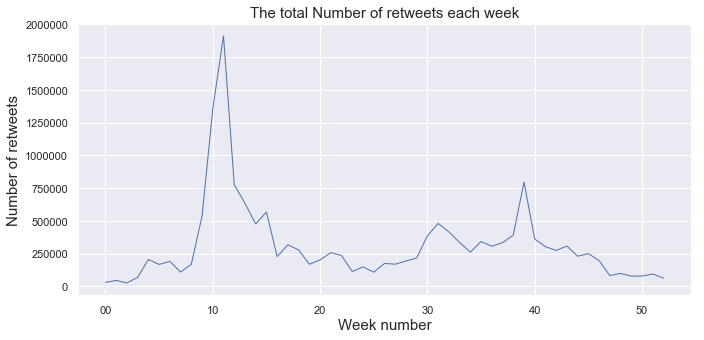

In [586]:
sns.set(rc={'figure.figsize':(11, 5)})
df_2020_week['retweetCount'].sum().plot(linewidth=1)


plt.title("The total Number of retweets each week", fontsize = 15)
plt.xlabel("Week number", fontsize = 15)
plt.ylabel("Number of retweets", fontsize = 15)

Text(0,0.5,'Number of retweets')

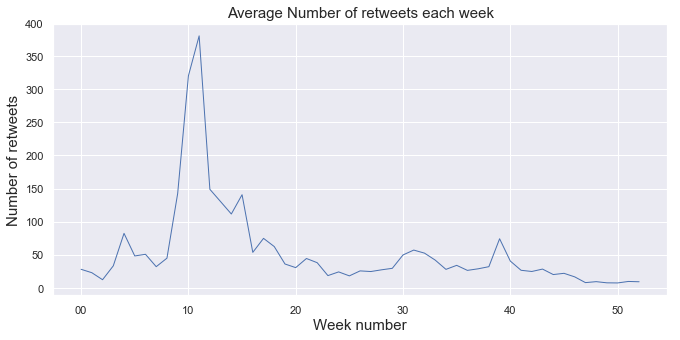

In [511]:
sns.set(rc={'figure.figsize':(11, 5)})
df_2020_week['retweetCount'].mean().plot(linewidth=1)

plt.title("Average Number of retweets each week", fontsize = 15)
plt.xlabel("Week number", fontsize = 15)
plt.ylabel("Number of retweets", fontsize = 15)

# Number of subscirbers there are 121 users  . Each user have different subscritber count. I took the average of subscriber count for each user then averaged that across all users :

In [386]:

# sum(df_2020_fb.groupby(['subscriberCount'])['userHandle'].unique().index)/2211

In [385]:
df_2020_fb.groupby(['uniqueUserId'])['subscriberCount'].mean().mean()

456570.55218196724

In [380]:
# user_id = list(df_2020_fb.groupby(['userHandle'])['userHandle'].count().index)

In [381]:
# df_2020_fb[df_2020_fb.userHandle == user_id[2]]['subscriberCount'].unique()

In [382]:
# for i in s:
#     print(i)

In [245]:
# sns.set(rc={'figure.figsize':(11, 5)})
# df_2020_week['subscriberCount'].sum().plot(linewidth=1)
# plt.title("Number of subscribers each week", fontsize = 15)
# plt.xlabel("Week number", fontsize = 15)
# plt.ylabel("Number of subscribers # billions", fontsize = 15)

### A number to characterise the activity. X% increase in messages from the the first week to the last week (or something?)

In [397]:
# df_2020_week['uniqueMessageId'].unique().mean()

In [256]:
messages_over_week = df_2020_week['uniqueMessageId'].nunique()

In [389]:
messages_over_week = messages_over_week[:-1]

Text(0,0.5,'Number of messages')

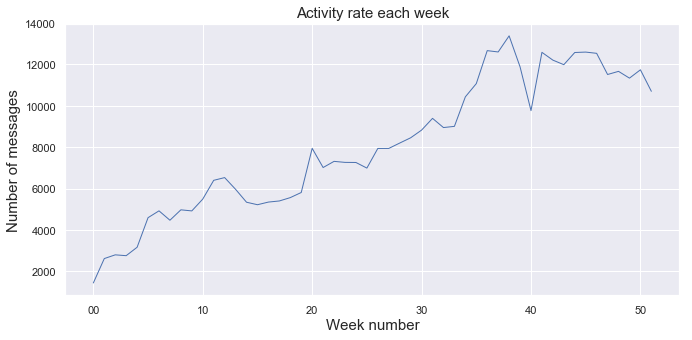

In [390]:
messages_over_week.plot(linewidth=1)
plt.title("Activity rate each week", fontsize = 15)
plt.xlabel("Week number", fontsize = 15)
plt.ylabel("Number of messages", fontsize = 15)

# China’s messengers 

In [422]:
messanger = df_2020.set_index('uniqueUserId').join(accounts.set_index('combined/uniqueUserId'), lsuffix='_left', rsuffix='_right')


### How many of each account type is in the list? 

In [449]:
accounts.groupby('account_category')['account'].count()

account_category
Chinese Ambassador      36
Confucius Institute    131
Consulate General       15
Embassy                129
Media outlet            63
Ministry official        7
Other diplomat           3
Name: account, dtype: int64

### State media are by far the most active: sending XXX messages: 258068

In [ ]:
# messanger.groupby(messanger.account_category)['uniqueMessageId'].nunique()

# Total number of keywords and average performance

In [431]:
xls = pd.ExcelFile('data/All-languages-keywords-consolidated-version.xlsx')


In [437]:
sheet1 = xls.parse(0)
sheet2 = xls.parse(1)
sheet3 = xls.parse(2)
sheet4 = xls.parse(3)

In [438]:
print(sheet1.count().sum())
print(sheet2.count().sum())
print(sheet3.count().sum())
print(sheet4.count().sum())

566
322
184
521


In [439]:
566+322+184+521

1593

# Master file columns

In [440]:
accounts.columns

Index(['Unnamed: 0', 'account', 'region', 'country', 'is_diplomatic_outlet',
       'is_state_media_outlet', 'is_confucius_institute',
       'is_official_central', 'account_category', 'name', 'social_media_type',
       'langs', 'link_or_handle', 'extracted_from_file', 'extracted_from_col',
       'lookup.twitter.user/verified',
       'lookup.lookup.crowdtangle.account/verified',
       'lookup.twitter.user/createdAt', 'combined/userHandle',
       'combined/uniqueUserId'],
      dtype='object')

# get all the messages produce by acccount type and make VOT for it to see the trend

In [452]:
state_media = messanger.groupby(messanger.account_category=='Media outlet')['uniqueMessageId'].nunique()

In [462]:
state_media = messanger[messanger.account_category=='Media outlet']

In [463]:
state_media = state_media.reset_index()

In [465]:
state_media.index = state_media.createdDate

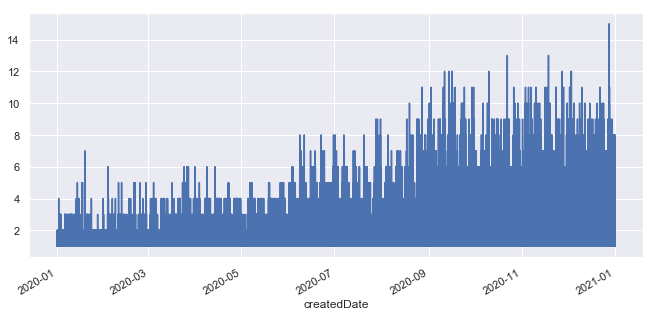

In [484]:
state_media.groupby(state_media.createdDate)['uniqueMessageId'].count().plot()

In [485]:
# for i,j in zip(state_media.groupby(state_media.createdDate)['uniqueMessageId'].count(),state_media.groupby(state_media.createdDate)['uniqueMessageId'].count().index):
#     print(i,j)

# China’s Focus 

### Language focus
- Arabic : 46047, 10.78
- English : 251730, 58.94
- Spanish : 34024, 7.96
- French : 19995, 4.6

In [155]:
language_proportion = df_2020.groupby(all_data.language)['uniqueMessageId'].nunique()

### How many accounts on the Master List were based in each region?

In [442]:
accounts_region = accounts.groupby(accounts.region)['account'].nunique()

In [579]:
accounts_region

region
Africa            40
Americas         101
Asia Pacific     102
Eurasia           13
Europe           104
International      5
Middle East       16
Name: account, dtype: int64

### What Was the total number of messages sent by all accounts from each region?
- Slide 52 and 81 Asia-Pacific (talk to Francesca to adjust them)

In [515]:
messages_region = messanger.groupby(messanger.region)['uniqueMessageId'].nunique()

In [518]:
messages_region

region
Africa            21588
Americas          47193
Asia Pacific     297053
Eurasia            1896
Europe            41573
International      6141
Middle East       11565
Name: uniqueMessageId, dtype: int64

In [186]:
language_mapping = {'af': 'Afrikaans',
 'ar': 'Arabic',
 'bg': 'Bulgarian',
 'bn': 'Bengali',
 'ca': 'Catalan, Valencian',
 'cs': 'Czech',
 'da': 'Danish',
 'de': 'German',
 'el': 'Greek',
 'en': 'English',
 'es': 'Spanish',
 'et': 'Estonian',
 'fa': 'Persian',
 'fi': 'Finnish',
 'fr': 'French',
 'he': 'Hebrew',
 'hi': 'Hindi',
 'hr': 'Croatian',
 'hu': 'Hungarian',
 'id': 'Indonesian',
 'it': 'Italian',
 'ja': 'Japanese',
 'ko': 'Korean',
 'lt': 'Lithuanian',
 'lv': 'Latvian',
 'mk': 'Macedonian',
 'ne': 'Nepali',
 'nl': 'Dutch, Flemish',
 'no': 'Norwegian',
 'pl': 'Polish',
 'pt': 'Portuguese',
 'ro': 'Romanian, Moldavian, Moldovan',
 'ru': 'Russian',
 'si': 'Sinhala, Sinhalese',
 'sk': 'Slovak',
 'sl': 'Slovenian',
 'so': 'Somali',
 'sq': 'Albanian',
 'sv': 'Swedish',
 'sw': 'Swahili',
 'ta': 'Tamil',
 'th': 'Thai',
 'tl': 'Tagalog',
 'tr': 'Turkish',
 'uk': 'Ukrainian',
 'ur': 'Urdu',
 'vi': 'Vietnamese',
 'zh-cn': 'Chinese Simplified',
 'zh-tw': 'Chinese Traditional'}

In [486]:
language_mapping = {
 'ar': 'Arabic',
 'de': 'German',
 'en': 'English',
 'es': 'Spanish',
 'fr': 'French',
 'it': 'Italian',
 'ja': 'Japanese',
 'ta': 'Tamil',
 'tl': 'Tagalog',
 'zh-cn': 'Chinese Simplified',
 'zh-tw': 'Chinese Traditional'}

In [491]:
pd.DataFrame(language_mapping.items())[1]

0                  Arabic
1                  German
2                 English
3                 Spanish
4                  French
5                 Italian
6                Japanese
7                   Tamil
8                 Tagalog
9      Chinese Simplified
10    Chinese Traditional
Name: 1, dtype: object

In [187]:
df_2020.language = df_2020.language.replace(language_mapping)

In [191]:
df_2020.to_csv('visualization/updated_languag')

# Performance of the analytics 

In [494]:
Y = pd.read_csv('data/themes.csv')


In [495]:
T = []
for i in list(Y.columns):
    if 'key' in i and 'matchSpans' not in i and 'numOfMatches' not in i and 'matches' not in i:
#     if 'key' in i:
        T.append(i)
        
mapping = {}
for t in T:
    mapping[t.replace('keyword.match/','')] = Y[Y[t]==True].index
    
F = [None] * len(Y)
R = []
for t,ind in mapping.items():
    for i in mapping[t]:
        if F[i] == None:
            F[i]=[t]
        else:
            F[i].append(t)

In [496]:
Y['combined/themes']=pd.Series(F)

In [497]:
multi_themes = []
for i in Y['combined/themes']:
    if i:
        if len(i)>1:
            multi_themes.append(i)

In [498]:
Final_data = Y.explode('combined/themes')

In [499]:
Final_data.groupby('combined/themes').count()['combined/messageId']
Final_data['combined/themes'] = Final_data['combined/themes'].fillna('other')
Final_data.groupby('combined/themes').count()['combined/messageId']

combined/themes
chinese-culture-and-people     25706
covid-19                       61085
economy                        39666
environment                     2546
geopolitics                    94521
media-narratives               80988
military-and-security          16683
other                         168120
politics-and-society           68970
technology                     11196
Name: combined/messageId, dtype: int64

In [500]:
output_columns =['combined/messageId',
                 'combined/userHandle',
                 'combined/createdDate',
                 'combined/uniqueUserId',
                 'combined/language',
                 'combined/themes']

In [501]:
Final_data[output_columns].to_csv('data/combined-themes-in-one-column.csv',index = False)

In [502]:
len(Final_data)-len(Final_data[Final_data['combined/themes']=='other'])

401361

In [503]:
len(Final_data[Final_data['combined/themes']!='other'])

401361

In [507]:
118524 /len(Final_data)

0.2081263466208706

In [ ]:
401361

In [220]:
len(Final_data[Final_data['combined/themes']=='other'])

168120

In [238]:
len(Final_data)

569481

In [225]:
set(Final_data['combined/themes'])

{'chinese-culture-and-people',
 'covid-19',
 'economy',
 'environment',
 'geopolitics',
 'media-narratives',
 'military-and-security',
 'other',
 'politics-and-society',
 'technology'}

In [236]:
print(f'Multi_themes: {len(multi_themes)}')

Multi_themes: 118524


In [508]:
Language	F1-score	Precision-score	Recall-score
Arabic	0.519	0.626	0.482
English	0.566	0.627	0.545
Spanish	0.47	0.616	0.425
French	0.476	0.434	0.573


0.9540636042402827

In [509]:
(0.626+0.627+0.616+0.434)/4

0.5757500000000001

In [510]:
(0.482+0.545+0.425+0.573)/4

0.5062500000000001

### How many of each account type is in the list? 

### How many of each account type is in the list? 

### How many of each account type is in the list? 

### How many of each account type is in the list? 

### How many of each account type is in the list? 

### How many of each account type is in the list? 

### How many of each account type is in the list? 

### How many of each account type is in the list? 

### How many of each account type is in the list? 

### How many of each account type is in the list? 

### How many of each account type is in the list? 

### How many of each account type is in the list? 